# Setup data

In [1]:
import numpy as np

# Đây là những dữ liệu đã giảm chiều về 255
# Read train data
train_images = np.load('../data_processed/train_images_datav2.npy')
train_labels = np.load('../data_processed/train_labels_datav2.npy')

# Read validation data
val_images = np.load('../data_processed/val_images_datav2.npy')
val_labels = np.load('../data_processed/val_labels_datav2.npy')

# # Read test data
# test_images = np.load('../data_processed/test_images_datav2.npy')
# test_labels = np.load('../data_processed/test_labels_datav2.npy')

In [2]:
# Prepare data and labels
X_train = train_images
y_train = train_labels

X_val = val_images
y_val = val_labels

# X_test = test_images
# y_test = test_labels
X_test = val_images
y_test = val_labels

# Setup SoftMax Regression

In [5]:
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks

# Softmax Regression
sr = models.Sequential([
    layers.InputLayer(shape=(225,)),
    layers.BatchNormalization(),
    layers.Dense(5, activation='softmax'),
])
sr.summary()

# Compile the model
# sr.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
sr.compile(
    optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"]
)
# Callback để lưu lại model có accuracy cao nhất trên tập validation
checkpoint = callbacks.ModelCheckpoint(
    "sr.keras", monitor="val_accuracy", save_best_only=True, mode="max"
)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ batch_normalization             │ (None, 225)            │           900 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │         1,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,030 (7.93 KB)

 Trainable params: 1,580 (6.17 KB)

 Non-trainable params: 450 (1.76 KB)

In [7]:
# Huấn luyện mô hình
history = sr.fit(
    X_train,
    y_train,
    epochs=100,
    validation_data=(X_test, y_test),
    callbacks=[checkpoint],
)

Epoch 1/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2199 - loss: 2.1551 - val_accuracy: 0.2456 - val_loss: 1.9072
Epoch 2/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3061 - loss: 1.7083 - val_accuracy: 0.3208 - val_loss: 1.6099
Epoch 3/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3978 - loss: 1.4407 - val_accuracy: 0.3760 - val_loss: 1.4736
Epoch 4/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4771 - loss: 1.3071 - val_accuracy: 0.4004 - val_loss: 1.4108
Epoch 5/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5209 - loss: 1.2244 - val_accuracy: 0.4116 - val_loss: 1.3795
Epoch 6/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5332 - loss: 1.1966 - val_accuracy: 0.4208 - val_loss: 1.3716
Epoch 7/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5255 - loss: 1.1884 - val_accuracy: 0.4240 - val_loss: 1.3659
Epoch 8/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5206 - loss: 1.1732 - val_accu

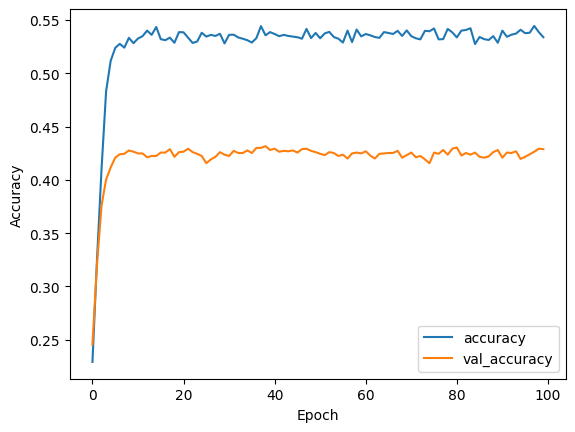

In [8]:
# Biểu đồ lịch sử huấn luyện
def plot_training_history(history):
    import matplotlib.pyplot as plt
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()
    
plot_training_history(history)

In [9]:
import joblib
import seaborn as sn

def plot_cf(y_true, y_pred):
    import pandas as pd
    import matplotlib.pyplot as plt
    data = confusion_matrix(y_true, y_pred)
    df_cm = pd.DataFrame(data, columns=np.unique(y_true), index = np.unique(y_true))
    df_cm.index.name = 'Actual'
    df_cm.columns.name = 'Predicted'
    plt.figure(figsize = (10,7))
    sn.set_theme(font_scale=1.4) # for label size
    sn.heatmap(df_cm, cmap="Blues", annot=True, annot_kws={"size": 16}, fmt='g')

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 961us/step
Confusion Matrix:
[[135  56  68 133 108]
 [ 58 236  88  64  54]
 [130  99 159  87  25]
 [121  50  55 229  45]
 [ 37  41  59  50 313]]
              precision    recall  f1-score   support

           0       0.28      0.27      0.28       500
           1       0.49      0.47      0.48       500
           2       0.37      0.32      0.34       500
           3       0.41      0.46      0.43       500
           4       0.57      0.63      0.60       500

    accuracy                           0.43      2500
   macro avg       0.42      0.43      0.43      2500
weighted avg       0.42      0.43      0.43      2500



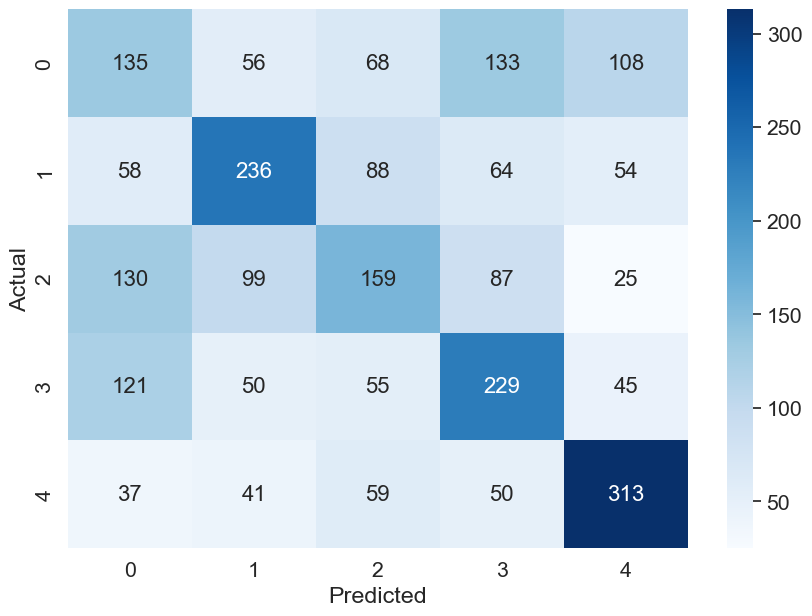

In [12]:
from sklearn.metrics import confusion_matrix, classification_report

# Predict labels for the test set
y_test_pred = sr.predict(X_test)
y_test_pred = np.argmax(y_test_pred, axis=1)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix:")
print(cm)
print(classification_report(y_test, y_test_pred))
plot_cf(y_test, y_test_pred)